# Dimensionality Reduction

Dimensionality Reduction is used to reduce the amount of features in a dataset without losing valuable information/connections. It can also help with data visualizations and make the data easier to understand. Reducing Dimensionality does cause info loss. It may speed up training but will most likely hurt the performance of the model.<br> <b>Try training with full dataset before using any Dimensionality reduction</b>

## Curse of Dimensionality 
Because of the nature of dimensions, the higher the dimension, the more space you have. In high dimensional datasets, the distance between instances can be very large. <b>The more dimensions in a dataset, the more likely you will overfit.</b>
<br>
<div class="alert alert-block alert-danger">
<b>The Curse Is REAL!!!</b>
</div>

## Main Approaches for D-Reduct

- Projection
- Manifold Learning

## PCA
Principal component analysis is the most popular dimensionality reduction algorithm. The main idea of PCA is to minimize the mean squared distance between the original dataset and its projection onto the new axis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Making a 3d Dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # n_components is what dimension to make the dataset into(ex. 3d to 2d)
X2d = pca.fit_transform(X)

In [3]:
# This ratio indicates the proportion of the dataset's varience that lies along each prinicpal component.
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This output tells us that about 84% of the dataset's variance lies along the first PC and about 14% lies on the second. This means that 2% of the dataset lies on the third PC meaning it probably carries little information.

### 3 ways to find the right amount of dimensions

1. Asking for a specific Variance Ratio

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 

In [5]:
# If  0 < n_components < 1.0 then it means that is what you want the variance ratio to be 
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [6]:
pca.n_components_

154

2. Graphing

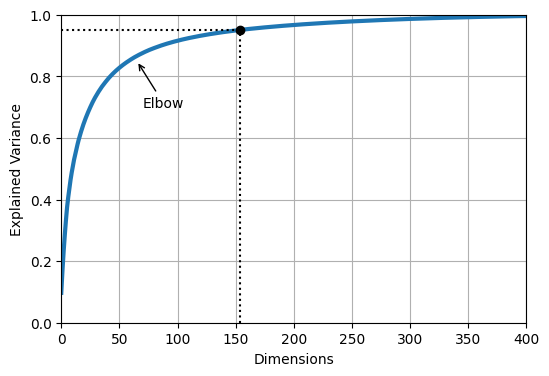

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

3. Hypertune n_componenets like any other hyperparameter

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
                                random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [9]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


### PCA for compression

In [10]:
X_recovered = pca.inverse_transform(X_reduced)

### Incremental PCA

A problem with regular PCA is it is very memory intensive and can be computational expensive to use with large datasets. To solve this problem you can use Incremental PCA which splits the data into mini batches and feeding them in 1 by 1

In [11]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    # Partial fit not regular fit
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

For large datasets with thousands of features, you should use random projection instead of PCA

## Random Projection

Random projection is when you use a random linear projection to drop dimensions. You can set a miniumal loss so you don't lose more information then you are willing to lose.

In [12]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, e = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=e)

d

7300

In [13]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)  # std dev = square root of variance

X = np.random.randn(m, n)  # generate a fake dataset
X_reduced = X @ P.T

In [14]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=e, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)  # same result as above

## LLE

Locally linear embedding is a nonlinear dimensionality reduction technique. It does not rely on projections. It instead measures how each training instance linearly relates to its nearest neighbors and then looks for a low-dimensional representation of the training set where these linear relationships are presurved. 

In [15]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

## Exercises

9. 

In [16]:
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [23]:
import time

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=101)
t = time.time()
rfc.fit(X_train, y_train)
end_t = time.time() - t
print(end_t)

12.34091854095459


In [24]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [25]:
rfc = RandomForestClassifier(n_estimators=50, random_state=101)
t = time.time()
rfc.fit(X_train_reduced, y_train)
end_t = time.time() - t
print(end_t)

39.96717715263367


<b>Dimensionality reduction doesn't always lead to faster training time, for some datasets it does the oppisite.</b>

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: user 1min 46s, sys: 52.3 ms, total: 1min 46s
Wall time: 1min 46s


SGDClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

In [28]:
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 19.2 s, sys: 772 ms, total: 19.9 s
Wall time: 19 s


SGDClassifier(random_state=42)

In [29]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8959

<b>Sometimes Dimensionality reduction can improve both training time and performance.</b>